# ✨ INTRODUÇÃO

A Netflix se destaca no reino de streaming de mídia e vídeo, com uma impressionante variedade de filmes e programas de TV acessíveis em sua plataforma, mas esta em busca de expansão.

O conjunto de dados tabulados cataloga de forma abrangente todas as ofertas na Netflix recentes e contém 8.809 entradas, cada uma representando um filme ou programa de TV disponivel na plataforma.

*   A bases de dados  utilizada ao longo deste trabalho foi retiradas do desafio da rede Kaggle.

.

Referência: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/data

.

# 🎬 COLUNAS:

`show_id:` Um identificador exclusivo para cada título.

`tipo:` A categoria do título, que pode ser 'Filme' ou 'Programa de TV'.

`título:` O nome do filme ou programa de TV.

`diretor:` Os diretores do filme ou programa de TV.

`elenco:` A lista dos principais atores/atrizes no título.

`país:` O país ou países onde o filme ou programa de TV foi produzido.

`data de estreia:` A data em que o título foi adicionado à Netflix.

`ano de lançamento:` O ano em que o filme ou programa de TV foi lançado originalmente.

`faixa etaria:` A classificação etária do título.

`duração:` A duração do título, em minutos para filmes e temporadas para programas de TV.

`assunto:` Os gêneros em que o título se enquadra.

.

# 🎯 OBJETIVO

*  Quais são os gêneros com mais conteúdo disponível na Netflix?

*  Devemos investir mais em filmes/séries ou programas de TV?

*  Em quais paises devemos divulgar os conteúdos?

# ⏬ **AJUSTANDO ÁREA DE TRABALHO E FAZENDO IMPORTAÇÕES**

In [ ]:
#importando a biblioteca

import pandas as pd

In [ ]:
# Defino dataframe para poder explorar posteriormente e fazer as analises

dataframe = pd.read_csv('netflix_titles.csv', encoding = 'latin-1', sep = ',', on_bad_lines='skip')

#  ⏯ **LIMPEZA E ORGANIZAÇÃO DOS DADOS**

In [ ]:
dataframe.info() #visualizando o dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [ ]:
num_linhas = dataframe.shape[0] #verificando quantidade de linhas

num_colunas = dataframe.shape[1] #verificando quantidade de colunas

colunas = dataframe.columns.values

print(f"Número de linhas: {num_linhas} \n"
      f"Número de colunas: {num_colunas} \n"
      f"Colunas: {colunas} \n")

Número de linhas: 8809 
Número de colunas: 26 
Colunas: ['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in' 'description'
 'Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14' 'Unnamed: 15' 'Unnamed: 16'
 'Unnamed: 17' 'Unnamed: 18' 'Unnamed: 19' 'Unnamed: 20' 'Unnamed: 21'
 'Unnamed: 22' 'Unnamed: 23' 'Unnamed: 24' 'Unnamed: 25'] 



In [ ]:
#Tentando selecionar as colunas 'Unnamede', transofrmando elas em string para incluir na lista de colunas e concatenar na 'description'

dataframe['description'] = dataframe[['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                                      'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                                      'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']].astype(str).agg(';'.join, axis=1)
print(dataframe['description'])

0       nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
1       nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
2       nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
3       nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
4       nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
                              ...                        
8804    nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
8805    nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
8806    nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
8807    nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
8808    nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;nan;na...
Name: description, Length: 8809, dtype: object


In [ ]:
dataframe.isnull() #para ver os NaN, ou seja, vazios.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8805,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8806,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8807,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
dataframe_copy = dataframe.copy() #criei uma cópia do dataframe antes de fazer limpeza

In [ ]:
# Exclusão de linhas duplicadas
dataframe_copy.drop_duplicates(inplace=True)
print(f"Linhas duplicadas: {dataframe_copy.duplicated().sum()}")

Linhas duplicadas: 0


In [ ]:
# Decidi excluir as  colunas 'description' e 'Unnamede'
dataframe_copy = dataframe.drop(columns=['description', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                                      'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                                      'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

print(f"Colunas: {dataframe_copy.columns.values}")

Colunas: ['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in']


In [ ]:
# Renomeando colunas
df_renomeado = dataframe_copy.rename(columns={'type': 'tipo', 'title': 'titulo', 'director': 'diretor', 'cast': 'elenco', 'country': 'país',
                               'date_added': 'data de estreia', 'release_year': 'ano de lançamento', 'rating': 'faixa etaria',
                               'duration': 'duração', 'listed_in': 'assunto'})

print(f"Colunas: {df_renomeado.columns.values}")


Colunas: ['show_id' 'tipo' 'titulo' 'diretor' 'elenco' 'país' 'data de estreia'
 'ano de lançamento' 'faixa etaria' 'duração' 'assunto']


# 📈 **ANÁLISE DOS DADOS**

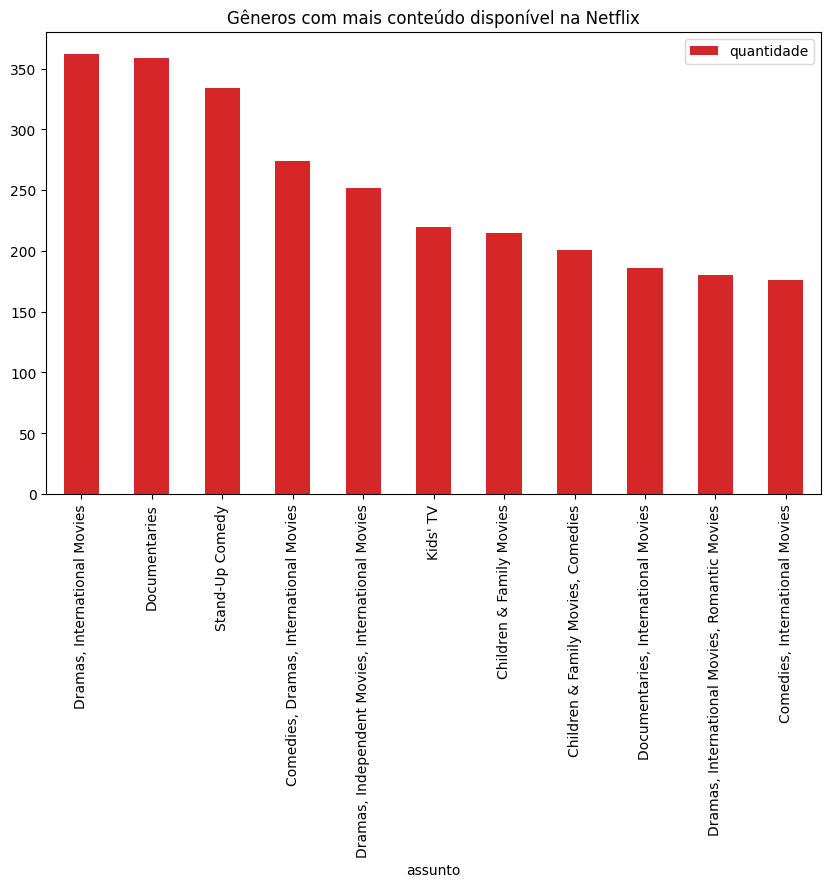

(<Axes: title={'center': 'Gêneros com mais conteúdo disponível na Netflix'}, xlabel='assunto'>,
 Text(0.5, 1.0, 'Gêneros com mais conteúdo disponível na Netflix'),
 None)

In [ ]:
# "Quais são os gêneros com mais conteúdo disponível na Netflix?"
df = df_renomeado.copy()
contagem_genero = df['assunto'].value_counts().reset_index()
contagem_genero

contagem_genero.columns = ['assunto', 'quantidade']
contagem_genero.head(10)

contagem_genero.head(10).plot(x='assunto', y='quantidade', kind='bar', color='tab:red', figsize=(10, 6))
plt.title('Gêneros com mais conteúdo disponível na Netflix')
plt.show()

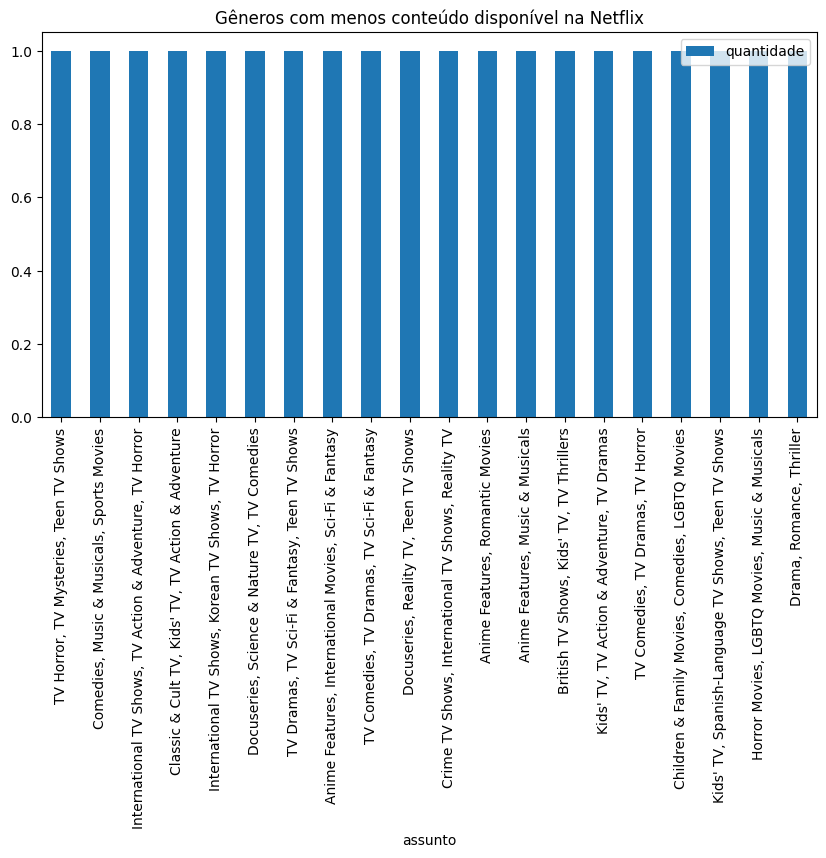

(<Axes: title={'center': 'Gêneros com menos conteúdo disponível na Netflix'}, xlabel='assunto'>,
 Text(0.5, 1.0, 'Gêneros com menos conteúdo disponível na Netflix'),
 None)

In [ ]:
## "Quais são os gêneros com menos conteúdo disponível na Netflix?"
df = df_renomeado.copy()
contagem_genero = df['assunto'].value_counts().reset_index()
contagem_genero

contagem_genero.columns = ['assunto', 'quantidade']
contagem_genero.tail(20)
contagem_genero.tail(20).plot(x='assunto', y='quantidade', kind='bar', color='tab:blue', figsize=(10, 5))
plt.title('Gêneros com menos conteúdo disponível na Netflix')
plt.show()

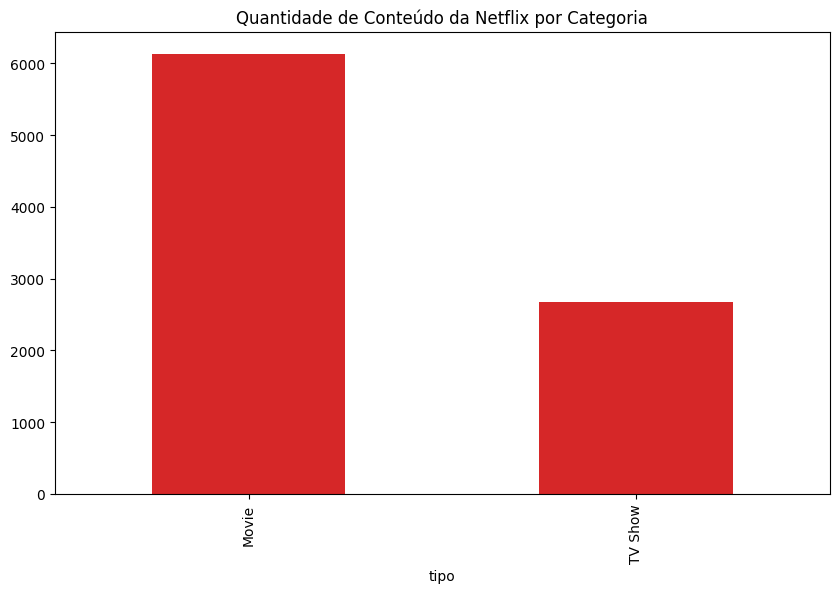

In [ ]:
#"Devemos investir mais em filmes/séries ou programas de TV?"
df['tipo'].value_counts().plot(kind='bar', color='tab:red', figsize=(10, 6))
plt.title('Quantidade de Conteúdo da Netflix por Categoria')
plt.show()

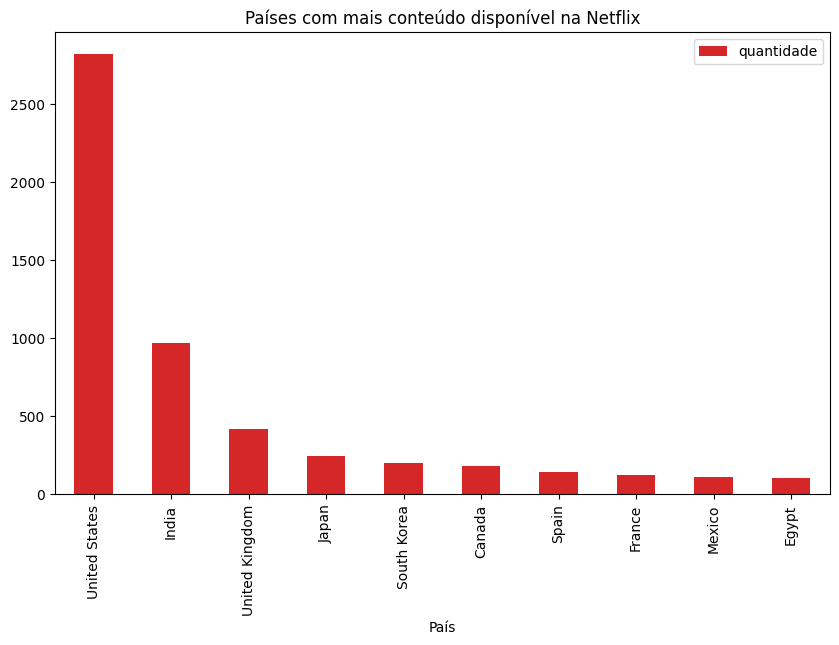

In [ ]:
#"Em quais paises devemos divulgar os conteudos?"
dataframe = df_renomeado.copy()
contagem_pais = df['país'].value_counts().reset_index()
contagem_pais

contagem_pais.columns = ['país', 'quantidade']
contagem_pais = contagem_pais.head(10)

contagem_pais = contagem_pais.sort_values(by='quantidade', ascending=False)
contagem_pais = contagem_pais.reset_index(drop=True)

contagem = contagem_pais.head(10)
contagem = contagem.set_index('país')
contagem.plot(kind='bar', color='tab:red', figsize=(10, 6))
plt.title('Países com mais conteúdo disponível na Netflix')
plt.xlabel('País')
plt.show()